In [26]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
arrival = pd.read_excel("Raw Data/GGc Data Collection.xlsx", sheet_name="Number of People", index_col=0)
arrival.drop(columns=['notes'], inplace=True)
arrival

,Recorded Number of People
Day,
1,261
2,166
3,238
4,253
5,269
6,274
7,276
8,239
9,228


In [28]:
arrival.drop(labels=2, axis=0, inplace=True) # drop the blatent outlier
arrival

,Recorded Number of People
Day,
1,261
3,238
4,253
5,269
6,274
7,276
8,239
9,228
10,285


In [29]:
list_of_departures = []
for day in range(1, 12):
    list_of_departures.append(pd.read_excel("Raw Data/GGc Data Collection.xlsx", sheet_name=f"Day {day}", index_col=0))
list_of_departures

[    Time (s)
 #           
 1     188.17
 2     258.87
 3     325.72
 4     308.84
 5      40.37
 6      96.17
 7     118.27
 8     165.15
 9     101.31
 10     93.73
 11     29.40
 12    168.63
 13     31.35
 14     38.67
 15     58.74
 16    201.81
 17     80.00
 18    120.95
 19     50.46
 20     23.32
 21     76.56
 22    142.91,
     Time (s)
 #           
 1     195.80
 2      38.70
 3     214.66
 4     188.59
 5      90.30
 6      34.66
 7     190.40
 8      47.00
 9      32.54
 10     66.48
 11     91.75
 12    211.64
 13    104.50
 14    238.61
 15    119.44
 16     30.38
 17    200.91
 18    104.82
 19     94.52
 20    214.19
 21    145.91,
     Time (s)
 #           
 1      91.86
 2     236.76
 3      63.94
 4     257.98
 5      88.00
 6     109.50
 7     224.81
 8      24.58
 9      83.76
 10     68.48
 11     98.80
 12    139.31
 13     72.78
 14    179.50
 15     77.29
 16    118.62
 17     41.40
 18     35.95
 19    230.18
 20    108.80
 21    123.69
 22     75.13
 23 

In [30]:
list_of_departure_times = pd.concat(list_of_departures)
list_of_departure_times

,Time (s)
#,
1,188.17
2,258.87
3,325.72
4,308.84
5,40.37
...,...
19,150.24
20,108.85
21,121.89


In [31]:
customer_no = []
customer_per_hour_sum = 0
for db in list_of_departures:
    customer_no.append(db.shape[0])
    db['Customers per hour'] = 14 * 3600 / db['Time (s)'] # 14 self-checkout counters
    db['Customers per hour'] = db['Customers per hour'].round(0).astype(int)
    customer_per_hour_sum += sum(db['Customers per hour']) 
customer_no

[22, 21, 25, 21, 25, 25, 30, 28, 30, 20, 23]

In [32]:
pos_values = np.array([])
for db in list_of_departures:
    for value in (db['Customers per hour']):
        pos_values = np.append(pos_values, value)
pos_values = pos_values.astype(int)
pos_values

array([ 268,  195,  155,  163, 1248,  524,  426,  305,  497,  538, 1714,
        299, 1608, 1303,  858,  250,  630,  417,  999, 2161,  658,  353,
        257, 1302,  235,  267,  558, 1454,  265, 1072, 1549,  758,  549,
        238,  482,  211,  422, 1659,  251,  481,  533,  235,  345,  549,
        213,  788,  195,  573,  460,  224, 2050,  602,  736,  510,  362,
        692,  281,  652,  425, 1217, 1402,  219,  463,  407,  671,  388,
       1826,  305,  246, 1724,  408,  601,  421, 1045, 1107,  291,  520,
       2140, 1697,  493,  475,  861,  627,  532, 1287,  733,  669, 1099,
       1031,  189,  477, 1778, 1009,  739,  999,  155,  370,  162, 1013,
        481,  513,  592,  557,  981, 1339,  937,  178,  660,  626,  368,
        249,  308,  346,  353,  246, 1301,  392, 2026,  645,  152,  330,
        383,  750,  919,  392,  251,  650,  725,  548,  427, 2243,  595,
        759,  664, 1545,  439,  340,  307,  305,  834, 1369,  351,  446,
        321,  558,  512,  367,  625,  691,  353,  4

In [33]:
raw_data_df = pd.DataFrame(pos_values, columns=['Customers per Hour (Departure)'])
raw_data_df.to_excel("Raw Data/GGc Data in a single column.xlsx", index=False)
print("Data written to output.xlsx")

Data written to output.xlsx


In [34]:
for i in range(10):
    temp = [x for x in pos_values if x >= i * 100 and x < (i + 1) * 100]
    print(len(temp), temp)
for i in range(4):
    temp = [x for x in pos_values if x >= 1000 + i * 500 and x < 1000 + (i + 1) * 500]
    print(len(temp), temp)

0 []
14 [195, 155, 163, 195, 189, 155, 162, 178, 152, 142, 155, 109, 199, 167]
36 [268, 299, 250, 257, 235, 267, 265, 238, 211, 251, 235, 213, 224, 281, 219, 246, 291, 249, 246, 251, 260, 270, 208, 273, 259, 224, 259, 211, 225, 258, 262, 274, 269, 211, 266, 290]
43 [305, 353, 345, 362, 388, 305, 370, 368, 308, 346, 353, 392, 330, 383, 392, 340, 307, 305, 351, 321, 367, 353, 317, 355, 382, 375, 388, 392, 367, 393, 318, 386, 352, 317, 303, 396, 326, 340, 352, 304, 315, 335, 391]
39 [426, 497, 417, 482, 422, 481, 460, 425, 463, 407, 408, 421, 493, 475, 477, 481, 427, 439, 446, 400, 407, 422, 487, 400, 445, 414, 444, 438, 488, 409, 438, 444, 498, 449, 446, 448, 466, 463, 413]
29 [524, 538, 558, 549, 533, 549, 573, 510, 520, 532, 513, 592, 557, 548, 595, 558, 512, 581, 530, 588, 575, 537, 512, 579, 523, 524, 517, 564, 552]
21 [630, 658, 602, 692, 652, 671, 601, 627, 669, 660, 626, 645, 650, 664, 625, 691, 610, 632, 655, 668, 631]
20 [758, 788, 736, 733, 739, 750, 725, 759, 751, 736, 789, 76

In [35]:
arrival_poisson_average = sum(arrival['Recorded Number of People']) / arrival.shape[0] #10
arrival_poisson_average

257.1

In [36]:
departure_poisson_average = customer_per_hour_sum / sum(customer_no) #11
departure_poisson_average

664.6222222222223

In [37]:
ave_time = 3600 / (664.62 / 14)
print(f"The average time for each customer to be serviced is {ave_time}")

The average time for each customer to be serviced is 75.83280671662003


In [38]:
import math
lambda_ = arrival_poisson_average
mu = departure_poisson_average

rho = lambda_/mu

p_0 = 1 / (sum([rho ** n / math.factorial(n) for n in range(14)]) + (rho ** 14) / math.factorial(14) / (1 - (rho / 14)))

L_q = rho ** (14 + 1) * p_0 / math.factorial(14 - 1) / ((14 - rho) ** 2)
L_s = L_q + rho
W_s = L_s / lambda_
W_q = L_q / lambda_
c = rho

print(f"""
       Lambda: {lambda_:.6f}
       Mu: {mu:.6f}
       Avg Time: {ave_time:.3f}s
       Rho: {rho:.6f}
       p_0: {p_0:.6f}

       Required Avgtime for rho<=1: {1/lambda_ * 3600:.3f}s
       
       Measurements of Performance:
       Expected no. of customers in system (L_s): {L_s:.3f}
       Expected no. of customers in queue (L_q): {L_q:.3f}
       Expected waiting time in system (W_s): {W_s * 3600:.3f}
       Expected waiting time in queue (W_q): {W_q * 3600:.3f}
       Expected no. of busy servers (c): {c:.3f}

       """)


       Lambda: 257.100000
       Mu: 664.622222
       Avg Time: 75.833s
       Rho: 0.386836
       p_0: 0.679202

       Required Avgtime for rho<=1: 14.002s
       
       Measurements of Performance:
       Expected no. of customers in system (L_s): 0.387
       Expected no. of customers in queue (L_q): 0.000
       Expected waiting time in system (W_s): 5.417
       Expected waiting time in queue (W_q): 0.000
       Expected no. of busy servers (c): 0.387

       


In [39]:
lambda_ = arrival_poisson_average
mu = departure_poisson_average

rho = lambda_/mu

p_0 = 1 / (sum([(14 * rho) ** n / math.factorial(n) for n in range(14)]) + (14 * rho) ** 14 / math.factorial(14) / (1 - rho))

L_q = rho * p_0 * (14 * rho) ** 14 / math.factorial(14) / (1 - rho)
L_s = L_q + 14 * rho
W_q = L_q / lambda_
W_s = W_q + 1 / (mu / 14)
c = rho

print(f"""
       Lambda: {lambda_:.3f}
       Mu: {mu:.3f}
       Avg Time: {ave_time:.3f}s
       Rho: {rho:.3f}
       p_0: {p_0:.3f}

       Required Avgtime for rho<=1: {1/lambda_ * 3600:.3f}s
       
       Measurements of Performance:
       Expected no. of customers in system (L_s): {L_s:.3f}
       Expected no. of customers in queue (L_q): {L_q:.3f}
       Expected waiting time in system (W_s): {W_s * 3600:.3f}
       Expected waiting time in queue (W_q): {W_q * 3600:.3f}
       Expected no. of busy servers (c): {c:.3f}

       """)


       Lambda: 257.100
       Mu: 664.622
       Avg Time: 75.833s
       Rho: 0.387
       p_0: 0.004

       Required Avgtime for rho<=1: 14.002s
       
       Measurements of Performance:
       Expected no. of customers in system (L_s): 5.416
       Expected no. of customers in queue (L_q): 0.001
       Expected waiting time in system (W_s): 75.841
       Expected waiting time in queue (W_q): 0.008
       Expected no. of busy servers (c): 0.387

       


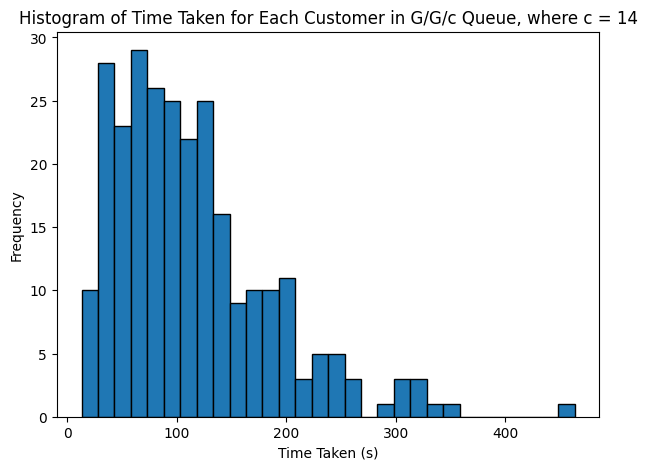

In [40]:
# Credits to my project partner
plt.figure(figsize=(7,5))
freq, bin_edges, _ = plt.hist(list_of_departure_times["Time (s)"], bins=30, edgecolor="black")
plt.xlabel("Time Taken (s)")
plt.ylabel("Frequency")
plt.title("Histogram of Time Taken for Each Customer in G/G/c Queue, where c = 14")
plt.show()

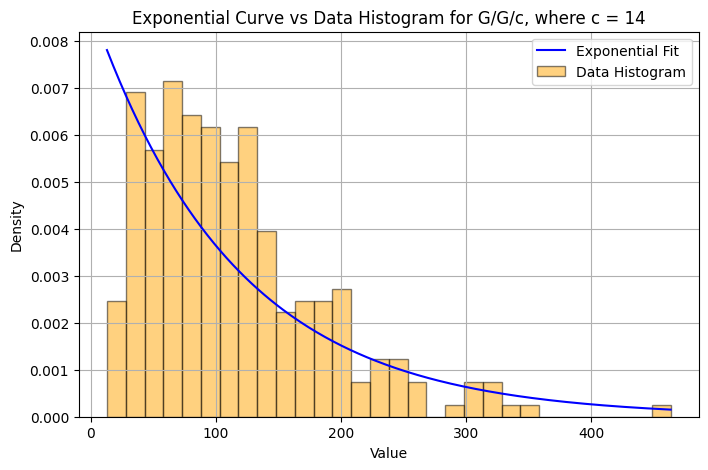

In [41]:
# Simulate exponential curve, credits to my project partner
data_min = min(list_of_departure_times["Time (s)"])
data_max = max(list_of_departure_times["Time (s)"])
lambda_est = 1 / np.mean(list_of_departure_times["Time (s)"]) 

x = np.linspace(data_min, data_max, len(list_of_departure_times["Time (s)"]))
y = lambda_est * np.exp(-lambda_est * x)
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Exponential Fit", color="blue")
plt.hist(list_of_departure_times["Time (s)"], bins=30, density=True, alpha=0.5, label="Data Histogram", color="orange", edgecolor="black")

plt.title("Exponential Curve vs Data Histogram for G/G/c, where c = 14")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()